### Import Library & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

In [4]:
symptom_severity = pd.read_csv('Symptom-severity.csv')
train = pd.read_csv('Training.csv')
description = pd.read_csv('description.csv')
diets = pd.read_csv('diets.csv')
medications = pd.read_csv('medications.csv')
precautions = pd.read_csv('precautions_df.csv')
symptoms = pd.read_csv('symtoms_df.csv')
workout = pd.read_csv('workout_df.csv')

### Exploratory Data Analysis

In [17]:
print("Symptom Severity Missing Values:\n", symptom_severity.isnull().sum(), "\n")
print("Training Data Missing Values:\n", train.isnull().sum(), "\n")
print("Description Missing Values:\n", description.isnull().sum(), "\n")
print("Diets Missing Values:\n", diets.isnull().sum(), "\n")
print("Medications Missing Values:\n", medications.isnull().sum(), "\n")
print("Precautions Missing Values:\n", precautions.isnull().sum(), "\n")
print("Symptoms Missing Values:\n", symptoms.isnull().sum(), "\n")
print("Workout Missing Values:\n", workout.isnull().sum(), "\n")



Symptom Severity Missing Values:
 Symptom    0
weight     0
dtype: int64 

Training Data Missing Values:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64 

Description Missing Values:
 Disease        0
Description    0
dtype: int64 

Diets Missing Values:
 Disease    0
Diet       0
dtype: int64 

Medications Missing Values:
 Disease       0
Medication    0
dtype: int64 

Precautions Missing Values:
 Unnamed: 0      0
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64 

Symptoms Missing Values:
 Unnamed: 0      0
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
dtype: int64 

Workout Missing Values:
 Unnamed: 0.1    0
Unnamed: 0      0


In [30]:
train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [18]:
print("Symptom Severity:\n", symptom_severity.head(), "\n")
print("Training Data:\n", training_data.head(), "\n")
print("Description:\n", description.head(), "\n")
print("Diets:\n", diets.head(), "\n")
print("Medications:\n", medications.head(), "\n")
print("Precautions:\n", precautions.head(), "\n")
print("Symptoms:\n", symptoms.head(), "\n")
print("Workout:\n", workout.head(), "\n")


Symptom Severity:
                 Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5 

Training Data:
    itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0   

In [7]:
train.shape

(4920, 133)

In [36]:
print(train.columns.tolist())


['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [14]:
print(train['prognosis'].unique())
print("Total Columns: ", len(train['prognosis'].unique()))


['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']
Total Columns:  41


### Preprocessing and Modelling

Logistic Regression Accuracy: 100.00%
Logistic Regression F1 Score: 1.00


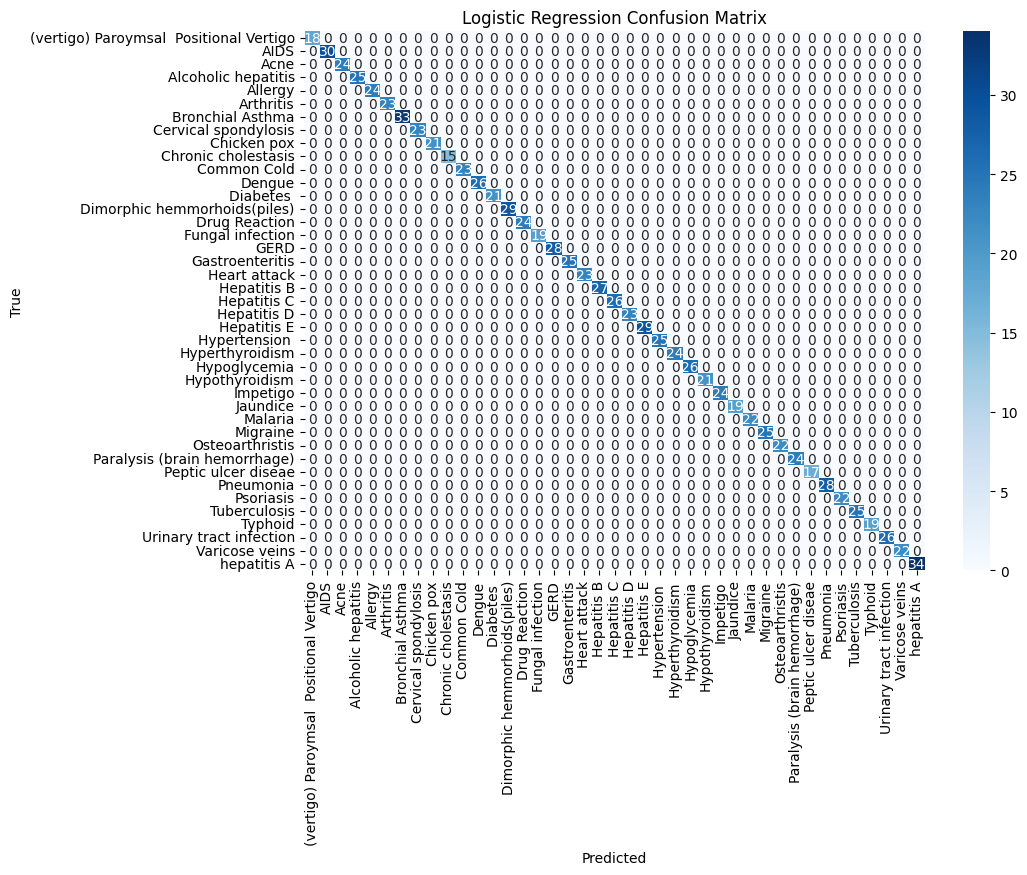

Random Forest Accuracy: 100.00%
Random Forest F1 Score: 1.00


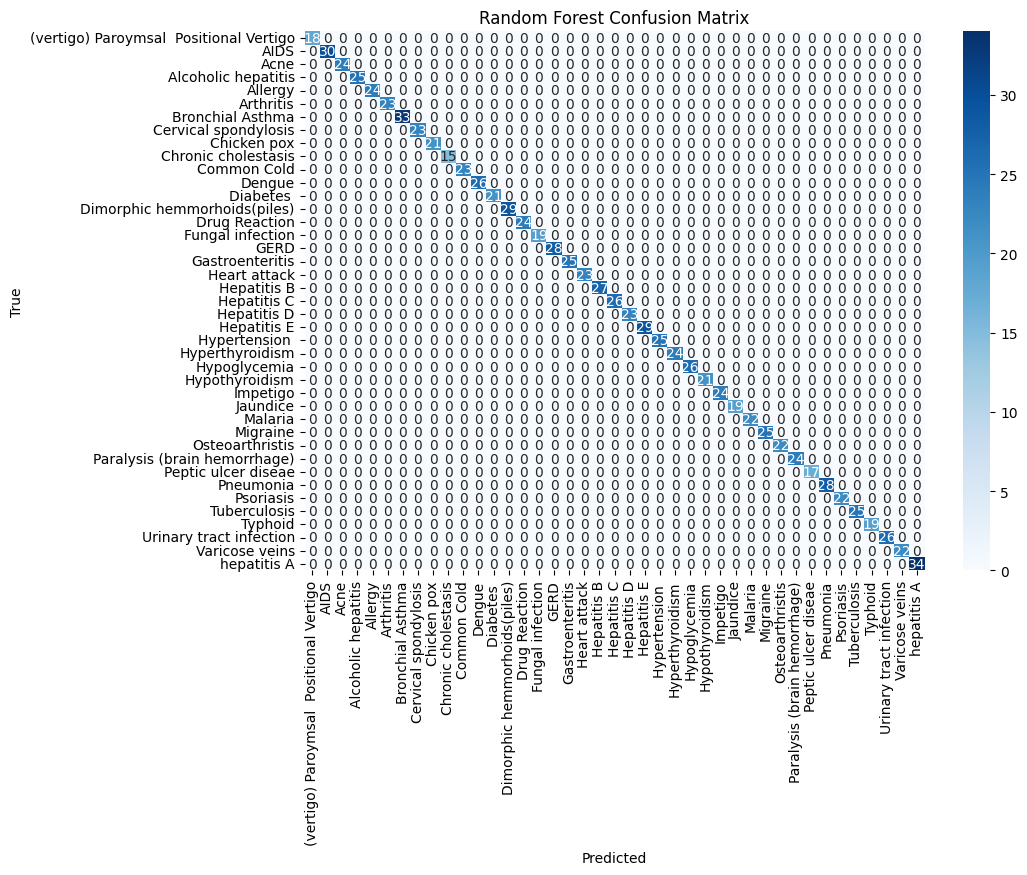

Gradient Boosting Accuracy: 100.00%
Gradient Boosting F1 Score: 1.00


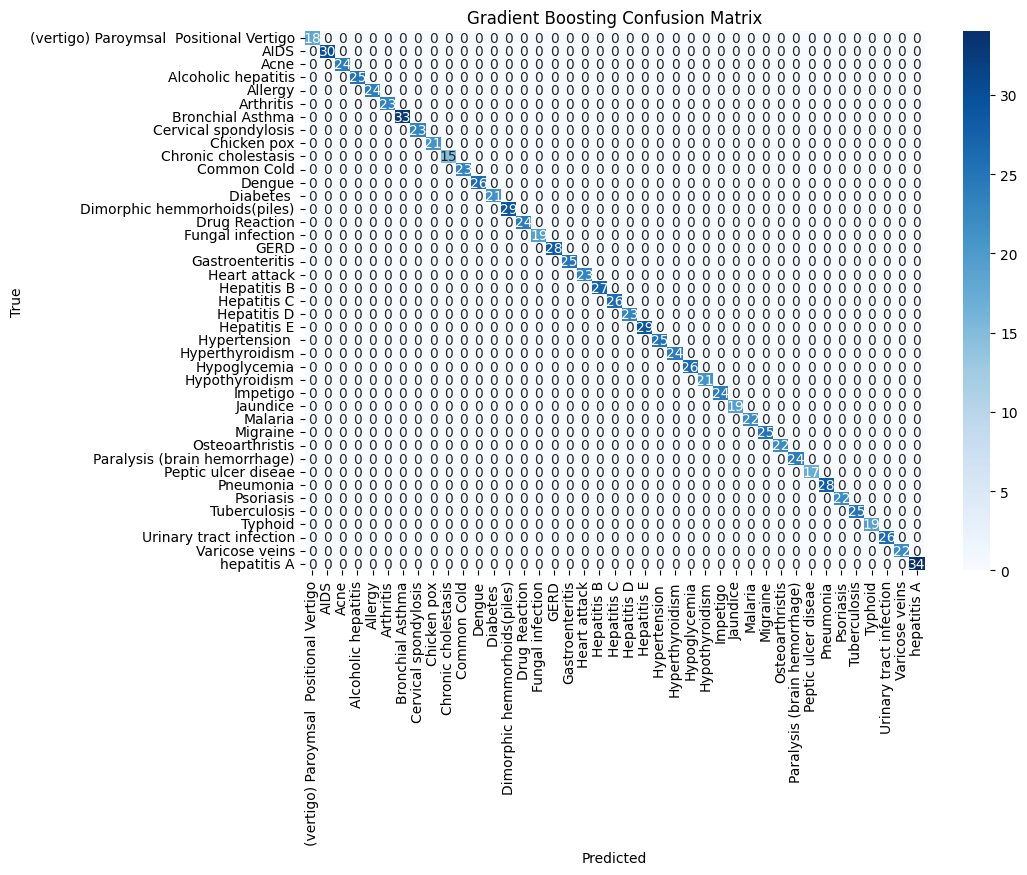

Support Vector Classifier Accuracy: 100.00%
Support Vector Classifier F1 Score: 1.00


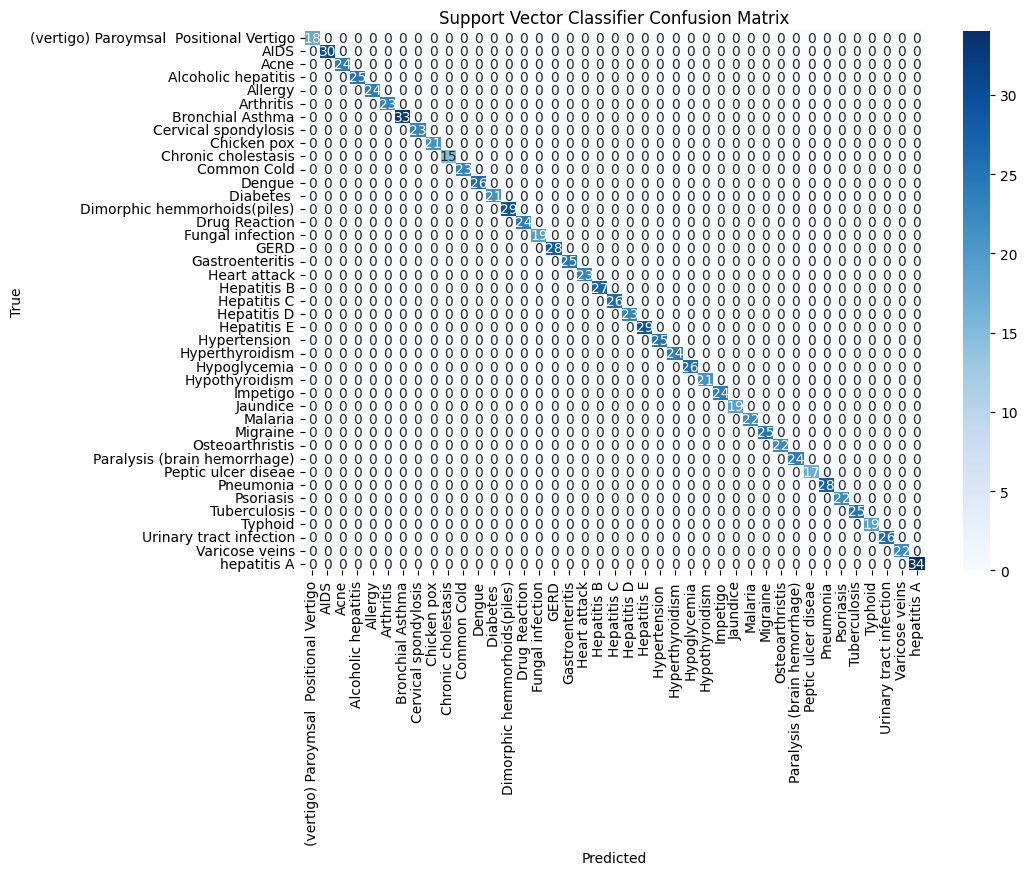

In [26]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

X = train.drop(columns=['prognosis'])
y = train['prognosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    f1 = f1_score(y_test, y_pred, average='weighted')

    cm = confusion_matrix(y_test, y_pred)
    
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{name} F1 Score: {f1:.2f}')
 
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [28]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
373,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3625,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
378,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [29]:
X_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
1807,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
184,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
410,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0
466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3092,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3772,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Prediksi pada seluruh data test
for name, model in models.items():
    y_pred = model.predict(X_test)
    predictions_df = pd.DataFrame({
        'True Label': y_test,
        'Predicted Label': y_pred
    })
    
    print(f'\n{name} Predictions:')
    print(predictions_df.head())



Logistic Regression Predictions:
               True Label      Predicted Label
373                  Acne                 Acne
4916                 Acne                 Acne
1550      Hyperthyroidism      Hyperthyroidism
3081                 AIDS                 AIDS
3857  Chronic cholestasis  Chronic cholestasis

Random Forest Predictions:
               True Label      Predicted Label
373                  Acne                 Acne
4916                 Acne                 Acne
1550      Hyperthyroidism      Hyperthyroidism
3081                 AIDS                 AIDS
3857  Chronic cholestasis  Chronic cholestasis

Gradient Boosting Predictions:
               True Label      Predicted Label
373                  Acne                 Acne
4916                 Acne                 Acne
1550      Hyperthyroidism      Hyperthyroidism
3081                 AIDS                 AIDS
3857  Chronic cholestasis  Chronic cholestasis

Support Vector Classifier Predictions:
               True 

In [24]:
# Misalnya kita menggunakan prediksi dari Random Forest untuk rekomendasi lebih lanjut
chosen_model = models['Random Forest']
y_pred = chosen_model.predict(X_test)

# Mendapatkan rekomendasi berdasarkan prediksi penyakit
predicted_disease = y_pred[0]

medication_recommendation = medications[medications['Disease'] == predicted_disease]['Medication'].values[0]
diet_recommendation = diets[diets['Disease'] == predicted_disease]['Diet'].values[0]
precaution_recommendation = precautions[precautions['Disease'] == predicted_disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values[0]
workout_recommendation = workout[workout['disease'] == predicted_disease]['workout'].values[0]

print(f"Predicted Disease: {predicted_disease}")
print(f"Medications: {medication_recommendation}")
print(f"Diets: {diet_recommendation}")
print(f"Precautions: {', '.join(precaution_recommendation)}")
print(f"Workout: {workout_recommendation}")


Predicted Disease: Acne
Medications: ['Antibiotics', 'Pain relievers', 'Antihistamines', 'Corticosteroids', 'Topical treatments']
Diets: ['Acne Diet', 'Low-Glycemic Diet', 'Hydration', 'Fruits and vegetables', 'Probiotics']
Precautions: bath twice, avoid fatty spicy food, drink plenty of water, avoid too many products
Workout: Consume a balanced diet


In [22]:
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object